## 验证搜索空间有效性

cifar100-benchmark
https://github.com/weiaicunzai/pytorch-cifar100
cifar10-benchmark
https://github.com/kuangliu/pytorch-cifar

In [1]:
import matplotlib.pyplot as plt
import numpy as np


### CIFAR-10

In [96]:
import pandas as pd
df = pd.read_table("../test.md",delimiter='|')
df.drop(columns='Unnamed: 0',inplace=True) 
df.drop(columns='Unnamed: 11',inplace=True) 
df.drop(labels=[0,1],inplace=True)
df=df.reset_index(drop=True)
for i in range(338):
    if float(df["flops"][i])>1000:
        df["flops"][i] = float(df["flops"][i])/1e6
        df["params"][i] = float(df["params"][i])/(1024*1024)
    else:
        df["flops"][i] = float(df["flops"][i])
        df["params"][i] = float(df["params"][i])
data = np.load("/home/qhy/Reserach/AICAS/predictor/dataset/data-dict-980.npy",allow_pickle=True).item()
for i in range(338):
    if int(df.iloc[i]["NO."]) in data.keys():
        df.iloc[i]["Acc"] = data[int(df.iloc[i]["NO."])]['acc']
df=df.reset_index(drop=True)
for row in range(df.shape[0]):
    layers = np.array([int(i) for i in df["layer"][row].split('-')])
    width = np.array([float(i) for i in df["ratio"][row].split('-')])*np.array([64,64,128,256,512])
    area = layers*width
    df.loc[row,"total layer"] = layers.sum()
    df.loc[row,"total width"] = width.sum()
    df.loc[row,"area"] = area.sum()
df["area"] = df["total layer"]*df["total width"]


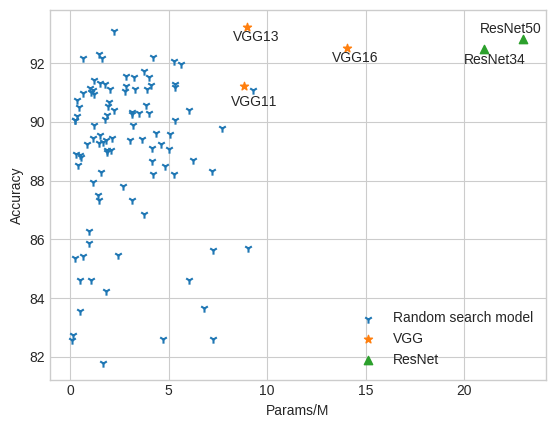

In [97]:
# plt.scatter((df["params"][0:328]),(df["Acc"][0:328]))
num =220
# plt.style.use('Solarize_Light2')
# plt.style.use('seaborn-v0_8-paper')
# plt.style.use('seaborn')
plt.scatter((df["params"][120:num]),(df["Acc"][120:num]),marker="1",label="Random search model")
# plt.scatter((df["params"][num+100:num+200]),(df["Acc"][num+100:num+200]))
# plt.scatter([19.11, 14.05, 8.98],[92.93,92.52,93.24],marker="*",label="VGG")
plt.scatter([ 14.05, 8.98, 8.8],[92.52,93.24,91.23],marker="*",label="VGG")

plt.scatter([ 21, 23],[92.49,92.83],marker="^",label="ResNet")

# plt.scatter([19.11, 14.05, 8.98, 8.8],[92.93,92.52,93.24,91.23],marker="*",label="VGG")

plt.ylabel("Accuracy")
plt.xlabel("Params/M")
# plt.text(18.41,92.45,"VGG19")
plt.text(13.31,92.05,"VGG16")
plt.text(8.25,92.75,"VGG13")
plt.text(8.15,90.55,"VGG11")
# plt.text(10.5,91.55,"ResNet18")
plt.text(20,91.99,"ResNet34")
plt.text(20.8,93.03,"ResNet50")
plt.legend()
# plt.title()
plt.savefig("/home/qhy/Reserach/AICAS/analysis/pic/paper/cifar10-random-search.svg",dpi=600)
plt.show()


In [98]:
# from easydict import EasyDict
# import yaml
# import sys
# import torch
# sys.path.append("..")
# from thop import profile 
# from models import model as M
# param = []
# config_path =["/home/qhy/Reserach/AICAS/config/cifar10/benchmark-vgg19-stage-2_2_4_4_4-ratio-1.0_1.0_1.0_1.0_1.0-op-vgg_vgg_vgg_vgg_vgg-max-False_True_True_True_True-cifar10.yaml",
#               "/home/qhy/Reserach/AICAS/config/cifar10/benchmark-vgg16-stage-2_2_3_3_3-ratio-1.0_1.0_1.0_1.0_1.0-op-vgg_vgg_vgg_vgg_vgg-max-False_True_True_True_True-cifar10.yaml",
#               "/home/qhy/Reserach/AICAS/config/cifar10/benchmark-vgg13-stage-2_2_2_2_2-ratio-1.0_1.0_1.0_1.0_1.0-op-vgg_vgg_vgg_vgg_vgg-max-False_True_True_True_True-cifar10.yaml",
#               "/home/qhy/Reserach/AICAS/config/cifar10/benchmark-vgg11-stage-1_1_2_2_2-ratio-1.0_1.0_1.0_1.0_1.0-op-vgg_vgg_vgg_vgg_vgg-max-False_True_True_True_True-cifar10.yaml"]
# for i in config_path:
#     config = EasyDict(yaml.full_load(open(i)))
#     model = M.Net(config, 10)
#     # model
#     input = torch.randn(1, 3, 32, 32)
#     flops,params = profile(model, inputs=(input, ))
#     print(flops/1e6,params/(1024*1024))
#     param.append(round(params/(1024*1024),2))

param

In [99]:
data_100 = np.load("/home/qhy/Reserach/AICAS/predictor/dataset/cifar100-data-dict-129-392-acc_above-20-add_best-searchx5.npy",allow_pickle=True).item()
data_100.keys()

dict_keys([252, 147, 171, 201, 229, 157, 227, 326, 241, 299, 365, 218, 234, 179, 149, 251, 150, 291, 233, 224, 349, 391, 197, 303, 206, 368, 289, 176, 215, 383, 225, 247, 286, 362, 258, 209, 300, 177, 380, 183, 325, 213, 132, 316, 347, 231, 386, 295, 140, 182, 222, 307, 142, 285, 148, 361, 191, 216, 343, 292, 348, 154, 270, 346, 354, 212, 390, 328, 363, 151, 277, 195, 230, 163, 162, 220, 188, 338, 174, 350, 366, 175, 146, 336, 141, 263, 269, 166, 329, 181, 317, 257, 145, 254, 296, 192, 249, 178, 313, 280, 189, 283, 172, 345, 239, 272, 267, 357, 238, 180, 226, 382, 302, 248, 152, 244, 297, 323, 173, 305, 130, 246, 207, 199, 260, 344, 198, 381, 353, 333, 337, 282, 205, 168, 223, 287, 360, 319, 315, 144, 331, 288, 334, 351, 335, 356, 261, 321, 221, 256, 389, 387, 309, 165, 339, 232, 355, 187, 210, 164, 298, 202, 340, 153, 245, 275, 184, 364, 228, 159, 330, 158, 320, 311, 242, 185, 156, 170, 301, 237, 217, 278, 204, 155, 219, 169, 304, 367, 143, 273, 208, 255, 284, 131, 342, 211, 214, 293,

In [100]:
from easydict import EasyDict
import yaml
import sys
import torch
sys.path.append("..")
from thop import profile 
from models import model as M
param = []
config_path =["/home/qhy/Reserach/AICAS/config/search-best-cifar100/1-stage-2_4_3_1_2-ratio-1.0_0.875_0.625_1.0_0.125-op-repvgg_repvgg_vgg_vgg_vgg-pool-False_True_False_False_False_True-pool_type-None_maxpool_None_None_None_avgpool-cifar100.yaml",
              "/home/qhy/Reserach/AICAS/config/search-best-cifar100/2-stage-2_2_1_1_1-ratio-1.0_1.0_1.0_1.0_0.125-op-repvgg_repvgg_vgg_repvgg_vgg-pool-False_True_False_False_False_False-pool_type-None_maxpool_None_None_None_None-cifar100.yaml",
              "/home/qhy/Reserach/AICAS/config/search-best-cifar100/3-stage-2_3_4_1_1-ratio-1.0_1.0_1.0_1.0_0.125-op-repvgg_repvgg_vgg_repvgg_vgg-pool-False_True_False_False_False_False-pool_type-None_maxpool_None_None_None_None-cifar100.yaml",
              "/home/qhy/Reserach/AICAS/config/search-best-cifar100/4-stage-2_2_1_1_1-ratio-1.0_1.0_1.0_1.0_0.125-op-repvgg_repvgg_vgg_repvgg_vgg-pool-False_False_False_False_False_False-pool_type-None_None_None_None_None_None-cifar100.yaml",
              "/home/qhy/Reserach/AICAS/config/search-best-cifar100/5-stage-2_1_3_1_1-ratio-1.0_1.0_1.0_1.0_0.125-op-repvgg_repvgg_vgg_repvgg_vgg-pool-False_True_False_False_False_False-pool_type-None_maxpool_None_None_None_None-cifar100.yaml",
              "/home/qhy/Reserach/AICAS/config/search-best-cifar100/6-stage-1_2_1_1_1-ratio-1.0_1.0_1.0_1.0_0.125-op-repvgg_repvgg_vgg_repvgg_vgg-pool-False_False_False_False_False_False-pool_type-None_None_None_None_None_None-cifar100.yaml"]
for i in config_path:
    config = EasyDict(yaml.full_load(open(i)))
    model = M.Net(config, 10)
    # model
    input = torch.randn(1, 3, 32, 32)
    flops,params = profile(model, inputs=(input, ))
    print(flops/1e6,params/(1024*1024))
    param.append(round(params/(1024*1024),2))
param

[INFO] Register zero_ops() for <class 'torch.nn.modules.activation.ReLU'>.
[INFO] Register count_convNd() for <class 'torch.nn.modules.conv.Conv2d'>.
[INFO] Register count_normalization() for <class 'torch.nn.modules.batchnorm.BatchNorm2d'>.
[INFO] Register zero_ops() for <class 'torch.nn.modules.container.Sequential'>.
[INFO] Register zero_ops() for <class 'torch.nn.modules.pooling.MaxPool2d'>.
[INFO] Register count_avgpool() for <class 'torch.nn.modules.pooling.AvgPool2d'>.
[INFO] Register count_adap_avgpool() for <class 'torch.nn.modules.pooling.AdaptiveAvgPool2d'>.
[INFO] Register count_linear() for <class 'torch.nn.modules.linear.Linear'>.
[INFO] Register zero_ops() for <class 'torch.nn.modules.dropout.Dropout'>.
109.910208 16.96512794494629
[INFO] Register zero_ops() for <class 'torch.nn.modules.activation.ReLU'>.
[INFO] Register count_convNd() for <class 'torch.nn.modules.conv.Conv2d'>.
[INFO] Register count_normalization() for <class 'torch.nn.modules.batchnorm.BatchNorm2d'>.
[

[16.97, 16.94, 17.4, 16.94, 17.18, 16.9]

In [101]:
import pandas as pd
df_100 = pd.read_table("../cifar100.md",delimiter='|')
df_100.drop(columns='Unnamed: 0',inplace=True) 
df_100.drop(columns='Unnamed: 11',inplace=True) 
df_100.drop(labels=[0],inplace=True)
df_100=df_100.reset_index(drop=True)
for i in range(237):
    df_100["flops"][i] = round(float(df_100["flops"][i]),2)
    df_100["params"][i] = round(float(df_100["params"][i])/(1.024*1.024),2)
    num = int(df_100['NO.'][i])
    if(num in data_100.keys()):
        df_100['Acc'][i] = data_100[num]['acc']
    else:
        print(num)
        df_100.drop(labels=[i],inplace=True)
    
df_100=df_100.reset_index(drop=True)
df_100.head(3)


190
240
265
310
312
314
318
332


,NO.,layer,ratio,op,pool,pool_type,datset,flops,params,Acc
0,141,2-4-6-5-3,1.0-1.0-0.25-0.625-1.0,repvgg-vgg-repvgg-vgg-vgg,False-True-False-False-False,None-maxpool-None-None-None-maxpool,cifar100,137.96,24.42,63.08
1,142,1-3-1-1-1,0.5-0.5-0.75-0.625-0.75,repvgg-repvgg-repvgg-vgg-repvgg,False-False-False-False-False,None-None-None-None-None-avgpool,cifar100,32.56,18.26,64.4
2,143,2-4-1-5-4,0.25-0.25-0.5-0.75-1.0,repvgg-vgg-vgg-vgg-repvgg,False-True-True-False-False,None-maxpool-avgpool-None-None-None,cifar100,79.67,27.04,59.79


In [102]:
df[df['params']<5]

,NO.,layer,ratio,op,pool,pool_type,datset,flops,params,Acc,total layer,total width,area
0,651,2-1-5-7-4,1.0-1.0-0.875-0.125-0.25,repvgg-vgg-repvgg-repvgg-vgg,False-True-True-False-True,None-avgpool-maxpool-None-avgpool-avgpool,cifar10,95.364864,1.180429,91.14,19.0,400.0,7600.0
3,654,2-1-3-2-2,0.375-0.375-0.125-0.875-0.875,repvgg-vgg-repvgg-repvgg-vgg,False-True-False-True-False,None-maxpool-None-maxpool-None-None,cifar10,28.61728,3.125872,86.58,10.0,736.0,7360.0
4,655,2-4-6-6-1,0.5-0.5-1.0-0.625-0.625,repvgg-vgg-vgg-vgg-repvgg,False-True-True-False-False,None-avgpool-maxpool-None-None-None,cifar10,94.948032,2.556711,90.9,19.0,672.0,12768.0
5,656,1-2-5-4-2,0.5-0.5-1.0-0.5-0.5,vgg-vgg-vgg-vgg-vgg,False-True-True-True-True,None-maxpool-avgpool-maxpool-maxpool-maxpool,cifar10,59.094272,2.029795,90.42,14.0,576.0,8064.0
6,657,2-3-2-5-1,0.375-0.375-0.25-0.625-0.375,repvgg-repvgg-repvgg-repvgg-repvgg,False-True-False-False-False,None-avgpool-None-None-None-maxpool,cifar10,31.549888,1.3659,89.47,13.0,432.0,5616.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,983,2-4-2-5-1,0.625-0.625-0.25-0.5-0.375,vgg-vgg-repvgg-repvgg-repvgg,False-True-False-True-False,None-maxpool-None-avgpool-None-None,cifar10,43.33,0.95,90.69,14.0,432.0,6048.0
332,984,1-1-3-4-1,0.75-0.75-0.5-1.0-0.875,vgg-repvgg-vgg-vgg-repvgg,False-True-True-True-True,None-maxpool-maxpool-maxpool-maxpool-None,cifar10,48.24,3.08,89.34,10.0,864.0,8640.0
333,985,1-3-5-8-1,0.125-0.125-0.75-0.75-1.0,vgg-vgg-repvgg-repvgg-vgg,False-False-False-True-False,None-None-None-maxpool-None-avgpool,cifar10,65.76,3.72,88.15,18.0,816.0,14688.0
334,986,1-3-5-8-4,0.25-0.25-0.25-0.375-0.125,vgg-repvgg-vgg-vgg-repvgg,False-False-False-True-True,None-None-None-maxpool-maxpool-None,cifar10,15.42,0.83,86.5,21.0,224.0,4704.0


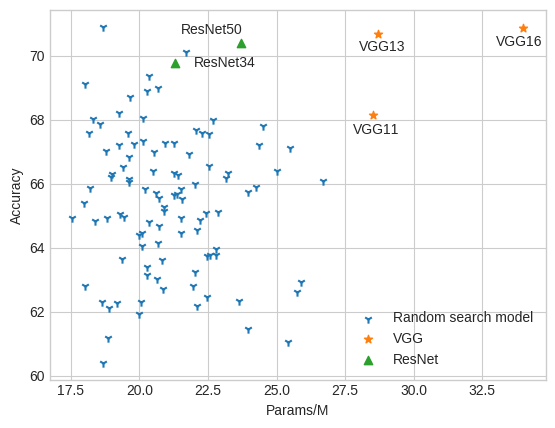

In [103]:
# plt.scatter((df["params"][0:328]),(df["Acc"][0:328]))
num =220
start = 120
# plt.style.use('Solarize_Light2')
# plt.style.use('seaborn-v0_8-paper')
# plt.style.use('seaborn')
plt.scatter((df_100["params"][start:num]),(df_100["Acc"][start:num]),marker="1",label="Random search model")
# plt.scatter((df["params"][num+100:num+200]),(df["Acc"][num+100:num+200]))
plt.scatter([28.5, 28.7, 34.0],[68.14,70.68,70.87],marker="*",label="VGG")
plt.scatter([ 21.3, 23.7],[69.76,70.39],marker="^",label="ResNet")

plt.ylabel("Accuracy")
plt.xlabel("Params/M")
# plt.text(38,69,"VGG19")
plt.text(33,70.3,"VGG16")
plt.text(28,70.15,"VGG13")
plt.text(27.8,67.55,"VGG11")
# plt.text(10.5,68.01,"ResNet18")
plt.text(22,69.66,"ResNet34")
plt.text(21.5,70.69,"ResNet50")
plt.legend()
# plt.title()
plt.savefig("/home/qhy/Reserach/AICAS/analysis/pic/paper/cifar10-random-search.svg",dpi=600)
plt.show()


/tmp/ipykernel_29924/3573471105.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


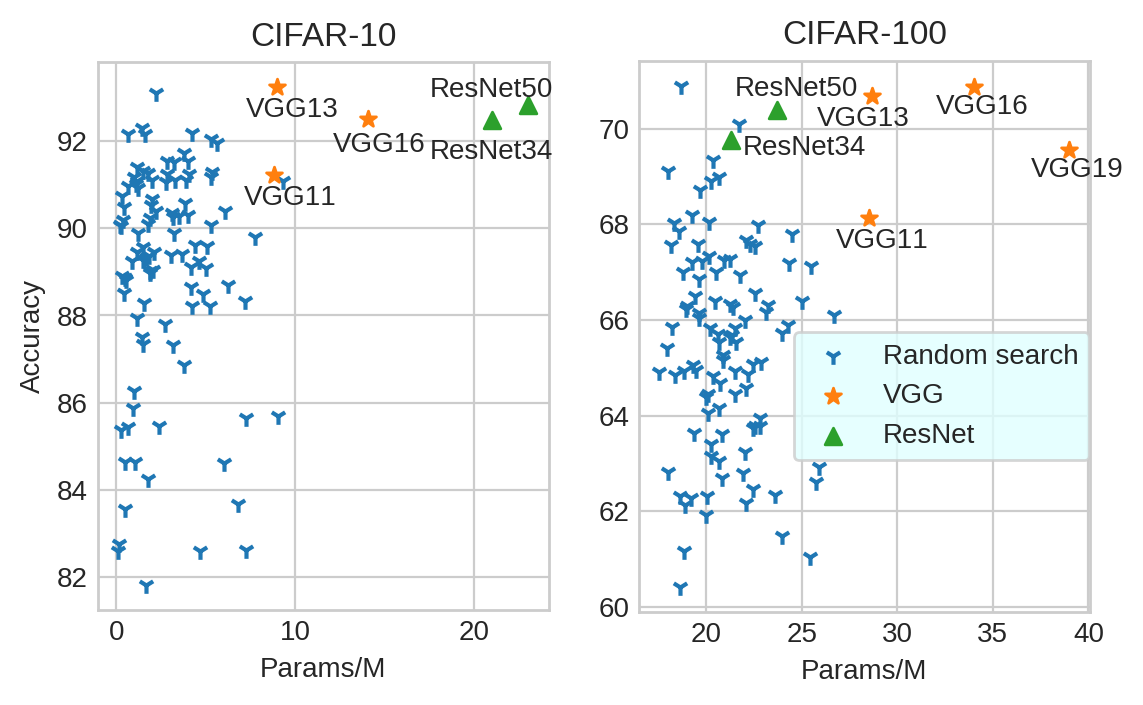

In [108]:
num =220
# plt.style.use('Solarize_Light2')
# plt.style.use('seaborn-v0_8-paper')
# plt.style.use('seaborn')
plt.style.use('seaborn-whitegrid')
fig,ax = plt.subplots(1,2,dpi=200)
ax[0].scatter((df["params"][120:num]),(df["Acc"][120:num]),marker="1",label="Random search")
# ax[0].scatter((df["params"][num+100:num+200]),(df["Acc"][num+100:num+200]))
ax[0].scatter([14.05, 8.98, 8.8],[92.52,93.24,91.23],marker="*",label="VGG")
# ax[0].scatter([19.11, 14.05, 8.98, 8.8],[92.93,92.52,93.24,91.23],marker="*",label="VGG")
ax[0].scatter([ 21, 23],[92.49,92.83],marker="^",label="ResNet")

ax[0].set_aspect(2.43)
ax[1].set_aspect(2.5)

ax[0].set_ylabel("Accuracy")
ax[0].set_xlabel("Params/M")
# ax[0].text(17.61,92.45,"VGG19")
ax[0].text(12.1,91.75,"VGG16")
ax[0].text(7.25,92.55,"VGG13")
ax[0].text(7.15,90.55,"VGG11")
ax[0].text(17.5,91.59,"ResNet34")
ax[0].text(17.5,93.03,"ResNet50")
ax[0].set_title("CIFAR-10")
ax[1].scatter((df_100["params"][start:num]),(df_100["Acc"][start:num]),marker="1",label="Random search")
# ax[1].scatter((df["params"][num+100:num+200]),(df["Acc"][num+100:num+200]))
ax[1].scatter([28.5, 28.7, 34.0, 39.0],[68.14,70.68,70.87,69.56],marker="*",label="VGG")
ax[1].scatter([ 21.3, 23.7],[69.76,70.39],marker="^",label="ResNet")

# ax[1].set_ylabel("Accuracy")
ax[1].set_xlabel("Params/M")
ax[1].text(37,69,"VGG19")
ax[1].text(32,70.3,"VGG16")
ax[1].text(25.8,70.05,"VGG13")
ax[1].text(26.8,67.5,"VGG11")
ax[1].set_title("CIFAR-100")
ax[1].text(21.9,69.46,"ResNet34")
ax[1].text(21.5,70.69,"ResNet50")
plt.legend(loc = 'lower right',bbox_to_anchor=(1.03, 0.25),frameon=True,facecolor='lightcyan')
plt.savefig("./pic/paper/random-search-sapce.eps",dpi=600)
plt.show()

In [3]:
history

histroy
history
history


## 验证predictor的有效性

### CIFAR-10

In [21]:
import os
import matplotlib.pyplot as plt
from sklearn import metrics
from scipy import stats
code_dataset = np.load("/home/qhy/Reserach/AICAS/predictor/dataset/code_510-989-add-new-searched.npy").astype(np.float32)
acc_dataset = np.load("/home/qhy/Reserach/AICAS/predictor/dataset/acc_32_510-989-add-new-searched.npy").astype(np.float32)
from sklearn import metrics
import sys
import torch
import tqdm
sys.path.append("..")
from predictor.mlp import FeedforwardNet
pair = []
# for n in tqdm.tqdm(np.linspace(50,460,42)):
# for n in tqdm.trange(50,460):
for n in tqdm.trange(50,51):
    train_num = int(n)
    train_code_dataset = code_dataset[train_num-50:train_num]
    test_code_dataset = code_dataset[train_num:train_num+50]
    train_acc_dataset = acc_dataset[train_num-50:train_num]
    test_acc_dataset = acc_dataset[train_num:train_num+50]
    # print(max(train_acc_dataset))
    # print(max(test_acc_dataset))
    for p in os.listdir("/home/qhy/Reserach/AICAS/predictor/MLP/cifar10"):
        model_path = "/home/qhy/Reserach/AICAS/predictor/MLP/cifar10/"+p
        model_param = torch.load(model_path)
        hyperparams = model_param["hyperparams"]
        predictor = FeedforwardNet(hyperparams["input_dims"],hyperparams["num_layers"],hyperparams["layer_width"],1,'relu')
        predictor.load_state_dict(model_param['model'])
        
        model_trained = predictor
        test_pred = []
        for i in test_code_dataset:
            input = torch.tensor(i)
            test_pred.append(model_trained(input).detach().numpy())
        
        train_pred = []
        for i in train_code_dataset:
            input = torch.tensor(i)
            train_pred.append(model_trained(input).detach().numpy())
        
        train_acc_dataset = np.array(train_acc_dataset)
        train_pred = np.array(train_pred)
        MSE = metrics.mean_squared_error(train_acc_dataset, train_pred)
        RMSE = metrics.mean_squared_error(train_acc_dataset, train_pred)**0.5
        MAE = metrics.mean_absolute_error(train_acc_dataset, train_pred)
        MAPE = metrics.mean_absolute_percentage_error(train_acc_dataset, train_pred)
        r_train,p_train = stats.spearmanr(train_acc_dataset, train_pred)
        R2_train = 1 - (MSE/np.mean((train_pred-np.mean(train_acc_dataset))**2))
        
        test_acc_dataset = np.array(test_acc_dataset)
        test_pred = np.array(test_pred)
        MSE = metrics.mean_squared_error(test_acc_dataset, test_pred)
        RMSE = metrics.mean_squared_error(test_acc_dataset, test_pred)**0.5
        MAE = metrics.mean_absolute_error(test_acc_dataset, test_pred)
        MAPE = metrics.mean_absolute_percentage_error(test_acc_dataset, test_pred)
        R2_test = 1 - (MSE/np.mean((test_pred-np.mean(test_acc_dataset))**2))
        r_test,p_test = stats.spearmanr(test_acc_dataset, test_pred)
        if (R2_train>R2_test and r_train>r_test and R2_test>0.8 and r_test>0.9):
            pair.append((train_num,p,R2_train,R2_test,r_train,r_test))

            
        

100%|██████████| 1/1 [00:00<00:00,  2.70it/s]


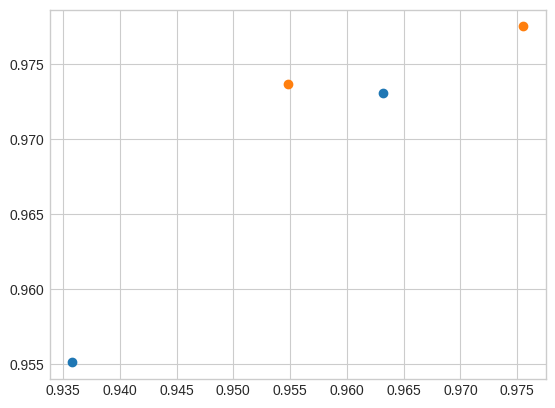

In [22]:
plt.scatter([_[3] for _ in pair ],[_[5] for _ in pair ])
plt.scatter([_[2] for _ in pair ],[_[4] for _ in pair ])


In [23]:
for _ in pair:
    if(0.001<_[3]-0.95<0.002):
        print(_)

In [24]:
def test(n,p):
    train_num = int(n)
    train_code_dataset = code_dataset[train_num-50:train_num]
    test_code_dataset = code_dataset[train_num:train_num+50]
    train_acc_dataset = acc_dataset[train_num-50:train_num]
    test_acc_dataset = acc_dataset[train_num:train_num+50]
    
    model_path = p
    model_param = torch.load(model_path)
    hyperparams = model_param["hyperparams"]
    predictor = FeedforwardNet(hyperparams["input_dims"],hyperparams["num_layers"],hyperparams["layer_width"],1,'relu')
    predictor.load_state_dict(model_param['model'])
    
    model_trained = predictor
    test_pred = []
    for i in test_code_dataset:
        input = torch.tensor(i)
        test_pred.append(model_trained(input).detach().numpy())
    
    train_pred = []
    for i in train_code_dataset:
        input = torch.tensor(i)
        train_pred.append(model_trained(input).detach().numpy())
    
    train_acc_dataset = np.array(train_acc_dataset)
    train_pred = np.array(train_pred)
    MSE = metrics.mean_squared_error(train_acc_dataset, train_pred)
    RMSE = metrics.mean_squared_error(train_acc_dataset, train_pred)**0.5
    MAE = metrics.mean_absolute_error(train_acc_dataset, train_pred)
    MAPE = metrics.mean_absolute_percentage_error(train_acc_dataset, train_pred)
    r_train,p_train = stats.spearmanr(train_acc_dataset, train_pred)
    R2_train = 1 - (MSE/np.mean((train_pred-np.mean(train_acc_dataset))**2))
    
    test_acc_dataset = np.array(test_acc_dataset)
    test_pred = np.array(test_pred)
    MSE = metrics.mean_squared_error(test_acc_dataset, test_pred)
    RMSE = metrics.mean_squared_error(test_acc_dataset, test_pred)**0.5
    MAE = metrics.mean_absolute_error(test_acc_dataset, test_pred)
    MAPE = metrics.mean_absolute_percentage_error(test_acc_dataset, test_pred)
    R2_test = 1 - (MSE/np.mean((test_pred-np.mean(test_acc_dataset))**2))
    r_test,p_test = stats.spearmanr(test_acc_dataset, test_pred)
    return train_acc_dataset, test_acc_dataset, train_pred, test_pred


        

/tmp/ipykernel_30453/3070516438.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


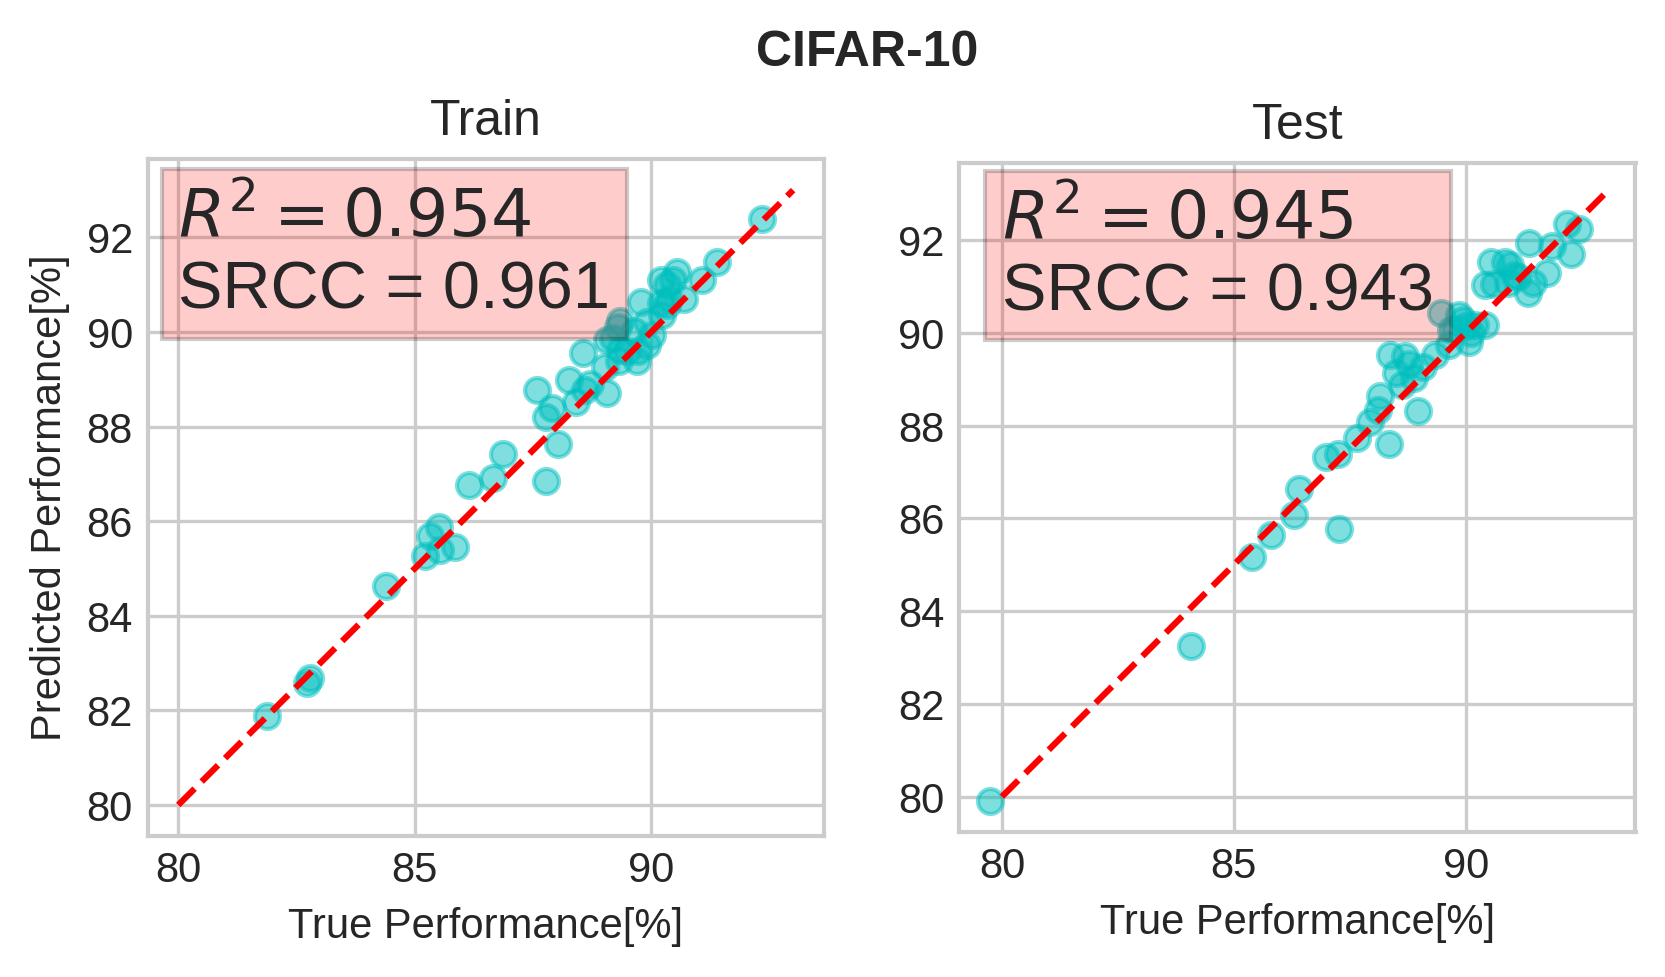

In [25]:
code_dataset = np.load("/home/qhy/Reserach/AICAS/predictor/dataset/code_510-989-add-new-searched.npy").astype(np.float32)
acc_dataset = np.load("/home/qhy/Reserach/AICAS/predictor/dataset/acc_32_510-989-add-new-searched.npy").astype(np.float32)
train_code_dataset = code_dataset[train_num-50:train_num]
test_code_dataset = code_dataset[train_num:train_num+50]
train_acc_dataset = acc_dataset[train_num-50:train_num]
test_acc_dataset = acc_dataset[train_num:train_num+50]
train_acc_dataset, test_acc_dataset, train_pred, test_pred = test(196, "/home/qhy/Reserach/AICAS/predictor/MLP/cifar10/"+'loss-mse-ratio-1e-05-input_dims-21-train_num-400-num_layers-5-layer_width-40_80_40_20_10-lr-0.01-regular-0.1-r-train-0.9738-r-test-0.713-diff2-1688.4561.pth')
plt.style.use('seaborn-whitegrid')
# 196, , 0.9548209011554718, 0.9519959501922131, 0.9659991400269863, 0.965495716481926
fig,ax = plt.subplots(1,2,dpi=300)
ax[0].set_aspect(1)
ax[1].set_aspect(1)

ax[0].scatter(train_pred,train_acc_dataset,c='c',alpha=0.5)
ax[0].plot(range(80,94),range(80,94),'--',c="r")
ax[0].set_title("Train")
ax[1].scatter(test_pred,test_acc_dataset,c='c',alpha=0.5)
ax[1].plot(range(80,94),range(80,94),'--',c="r")  
ax[1].set_title("Test")
ax[0].set_xlabel("True Performance[%]")
ax[1].set_xlabel("True Performance[%]")
ax[0].set_ylabel("Predicted Performance[%]")
ax[0].text(80,90.5,'$R^2 = 0.954$'+"\nSRCC = 0.961",bbox=dict(facecolor='red', alpha=0.2),fontsize =16)
ax[1].text(80,90.5,'$R^2 = 0.945$'+"\nSRCC = 0.943",bbox=dict(facecolor='red', alpha=0.2),fontsize =16)
plt.suptitle('CIFAR-10',x=0.5,y=0.82,fontweight='bold')
plt.savefig("./pic/paper/acc-predictor-cifar-10.eps",dpi=600)
plt.show()

### CIFAR-100

In [26]:
import os
import matplotlib.pyplot as plt
from sklearn import metrics
from scipy import stats
import sys
import torch
import tqdm
sys.path.append("..")
from predictor.mlp import FeedforwardNet
acc_list_all = []
code_list_all = []
data_path = "/home/qhy/Reserach/AICAS/predictor/dataset/cifar100-data-dict-129-392-acc_above-20-add_best-searchx5.npy"
dataset = np.load(data_path,allow_pickle=True).item()
for k in dataset.keys():
    acc_list_all.append(dataset[k]['acc'])
    code_list_all.append(dataset[k]['code'])

pair = []
for n in tqdm.trange(50,190):
    train_num = int(n)
    train_code_dataset = code_list_all[train_num-50:train_num]
    test_code_dataset = code_list_all[train_num:train_num+50]
    train_acc_dataset = acc_list_all[train_num-50:train_num]
    test_acc_dataset = acc_list_all[train_num:train_num+50]
    # print(max(train_acc_dataset))
    # print(max(test_acc_dataset))
    for p in os.listdir("/home/qhy/Reserach/AICAS/predictor/MLP/cifar100"):
        model_path = "/home/qhy/Reserach/AICAS/predictor/MLP/cifar100/"+p
        model_param = torch.load(model_path)
        hyperparams = model_param["hyperparams"]
        predictor = FeedforwardNet(hyperparams["input_dims"],hyperparams["num_layers"],hyperparams["layer_width"],1,'relu')
        predictor.load_state_dict(model_param['model'])
        
        model_trained = predictor
        test_pred = []
        for i in test_code_dataset:
            input = torch.tensor(i)
            test_pred.append(model_trained(input).detach().numpy())
        
        train_pred = []
        for i in train_code_dataset:
            input = torch.tensor(i)
            train_pred.append(model_trained(input).detach().numpy())
        
        train_acc_dataset = np.array(train_acc_dataset)
        train_pred = np.array(train_pred)
        MSE = metrics.mean_squared_error(train_acc_dataset, train_pred)
        RMSE = metrics.mean_squared_error(train_acc_dataset, train_pred)**0.5
        MAE = metrics.mean_absolute_error(train_acc_dataset, train_pred)
        MAPE = metrics.mean_absolute_percentage_error(train_acc_dataset, train_pred)
        r_train,p_train = stats.spearmanr(train_acc_dataset, train_pred)
        R2_train = 1 - (MSE/np.mean((train_pred-np.mean(train_acc_dataset))**2))
        
        test_acc_dataset = np.array(test_acc_dataset)
        test_pred = np.array(test_pred)
        MSE = metrics.mean_squared_error(test_acc_dataset, test_pred)
        RMSE = metrics.mean_squared_error(test_acc_dataset, test_pred)**0.5
        MAE = metrics.mean_absolute_error(test_acc_dataset, test_pred)
        MAPE = metrics.mean_absolute_percentage_error(test_acc_dataset, test_pred)
        R2_test = 1 - (MSE/np.mean((test_pred-np.mean(test_acc_dataset))**2))
        r_test,p_test = stats.spearmanr(test_acc_dataset, test_pred)
        if (R2_train>R2_test and r_train>r_test and R2_test>0.7 and r_test>0.7):
            pair.append((train_num,p,R2_train,R2_test,r_train,r_test))

            
        

  0%|          | 0/140 [00:00<?, ?it/s]/home/qhy/anaconda3/envs/torch/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
/home/qhy/anaconda3/envs/torch/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
/home/qhy/anaconda3/envs/torch/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
/home/qhy/anaconda3/envs/torch/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
  1%|    

KeyboardInterrupt: 

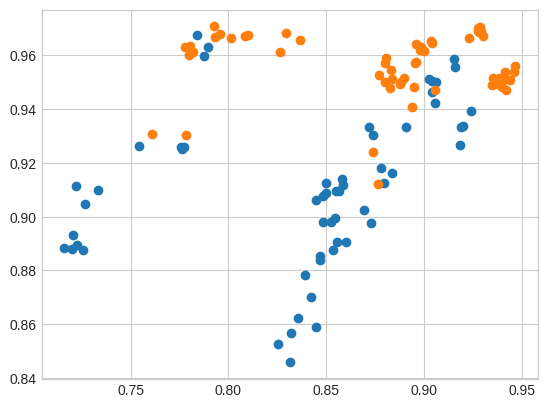

In [27]:
plt.scatter([_[3] for _ in pair ],[_[5] for _ in pair ])
plt.scatter([_[2] for _ in pair ],[_[4] for _ in pair ])


In [28]:
for _ in pair:
    if(_[3]>0.92):
        print(_)

(99, 'loss-mse-ratio-1e-05-input_dims-21-train_num-140-num_layers-5-layer_width-40_80_40_20_10-lr-0.01-regular-0.1-r-train-0.95-r-test-0.8193-diff2-1389.6346.pth', 0.9377832123316867, 0.9235789066467037, 0.9492135935302773, 0.9391087207068767)


In [29]:
def test_100(n,p):
    train_num = int(n)
    train_code_dataset = code_list_all[train_num-50:train_num]
    test_code_dataset = code_list_all[train_num:train_num+50]
    train_acc_dataset = acc_list_all[train_num-50:train_num]
    test_acc_dataset = acc_list_all[train_num:train_num+50]
    
    model_path = p
    model_param = torch.load(model_path)
    hyperparams = model_param["hyperparams"]
    predictor = FeedforwardNet(hyperparams["input_dims"],hyperparams["num_layers"],hyperparams["layer_width"],1,'relu')
    predictor.load_state_dict(model_param['model'])
    
    model_trained = predictor
    test_pred = []
    for i in test_code_dataset:
        input = torch.tensor(i)
        test_pred.append(model_trained(input).detach().numpy())
    
    train_pred = []
    for i in train_code_dataset:
        input = torch.tensor(i)
        train_pred.append(model_trained(input).detach().numpy())
    
    train_acc_dataset = np.array(train_acc_dataset)
    train_pred = np.array(train_pred)
    MSE = metrics.mean_squared_error(train_acc_dataset, train_pred)
    RMSE = metrics.mean_squared_error(train_acc_dataset, train_pred)**0.5
    MAE = metrics.mean_absolute_error(train_acc_dataset, train_pred)
    MAPE = metrics.mean_absolute_percentage_error(train_acc_dataset, train_pred)
    r_train,p_train = stats.spearmanr(train_acc_dataset, train_pred)
    R2_train = 1 - (MSE/np.mean((train_pred-np.mean(train_acc_dataset))**2))
    
    test_acc_dataset = np.array(test_acc_dataset)
    test_pred = np.array(test_pred)
    MSE = metrics.mean_squared_error(test_acc_dataset, test_pred)
    RMSE = metrics.mean_squared_error(test_acc_dataset, test_pred)**0.5
    MAE = metrics.mean_absolute_error(test_acc_dataset, test_pred)
    MAPE = metrics.mean_absolute_percentage_error(test_acc_dataset, test_pred)
    R2_test = 1 - (MSE/np.mean((test_pred-np.mean(test_acc_dataset))**2))
    r_test,p_test = stats.spearmanr(test_acc_dataset, test_pred)
    return train_acc_dataset, test_acc_dataset, train_pred, test_pred


        

/tmp/ipykernel_30453/2528904129.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


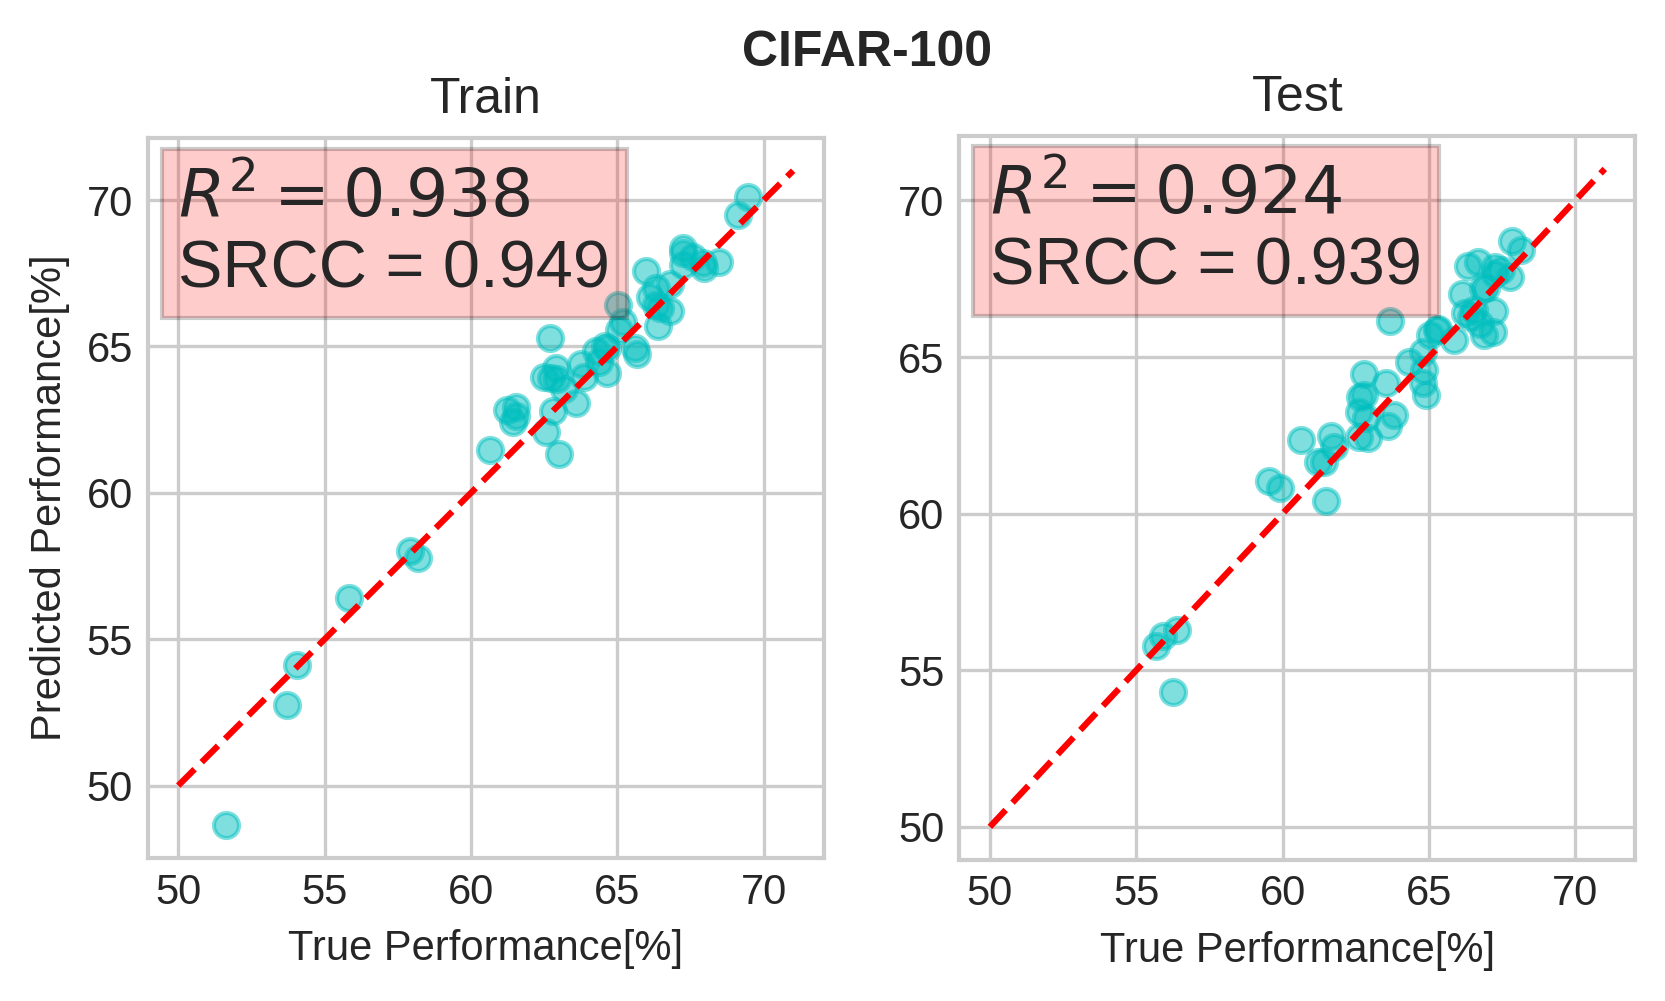

In [30]:
acc_list_all = []
code_list_all = []
data_path = "/home/qhy/Reserach/AICAS/predictor/dataset/cifar100-data-dict-129-392-acc_above-20-add_best-searchx5.npy"
dataset = np.load(data_path,allow_pickle=True).item()
for k in dataset.keys():
    acc_list_all.append(dataset[k]['acc'])
    code_list_all.append(dataset[k]['code'])
train_acc_dataset_100, test_acc_dataset_100, train_pred_100, test_pred_100 = test_100(99, "/home/qhy/Reserach/AICAS/predictor/MLP/cifar100/"+'loss-mse-ratio-1e-05-input_dims-21-train_num-140-num_layers-5-layer_width-40_80_40_20_10-lr-0.01-regular-0.1-r-train-0.95-r-test-0.8193-diff2-1389.6346.pth')
plt.style.use('seaborn-whitegrid')
fig,ax = plt.subplots(1,2,dpi=300)
ax[0].set_aspect(1)
ax[1].set_aspect(1.07)
ax[0].scatter(train_pred_100,train_acc_dataset_100,c='c',alpha=0.5)
ax[0].plot(range(50,72),range(50,72),'--',c="r")
ax[0].set_title("Train")
ax[1].scatter(test_pred_100,test_acc_dataset_100,c='c',alpha=0.5)
ax[1].plot(range(50,72),range(50,72),'--',c="r")  
ax[1].set_title("Test")
ax[0].set_xlabel("True Performance[%]")
ax[1].set_xlabel("True Performance[%]")
ax[0].set_ylabel("Predicted Performance[%]")
ax[0].text(50,67.,'$R^2 = 0.938$'+"\nSRCC = 0.949",bbox=dict(facecolor='red', alpha=0.2),fontsize =16)
ax[1].text(50,67.3,'$R^2 = 0.924$'+"\nSRCC = 0.939",bbox=dict(facecolor='red', alpha=0.2),fontsize =16)
plt.suptitle('CIFAR-100',x=0.5,y=0.82,fontweight='bold')
plt.savefig("./pic/paper/acc-predictor-cifar-100.eps",dpi=600)
plt.show()

In [86]:
# fig,ax = plt.subplots(2,2)
# ax[0][0].scatter(train_pred,train_acc_dataset,c='c',alpha=0.5)
# ax[0].plot(range(80,94),range(80,94),'--',c="r")
# ax[0].set_title("Train")
# ax[1].scatter(test_pred,test_acc_dataset,c='c',alpha=0.5)
# ax[1].plot(range(80,94),range(80,94),'--',c="r")  
# ax[1].set_title("Test")
# ax[0].set_xlabel("True Performance")
# ax[1].set_xlabel("True Performance")
# ax[0].set_ylabel("Predicted Performance")
# ax[0].text(81,91,'$R^2 = 0.954$'+"\nSRCC = 0.961",bbox=dict(facecolor='red', alpha=0.2))
# ax[1].text(81,91,'$R^2 = 0.945$'+"\nSRCC = 0.943",bbox=dict(facecolor='red', alpha=0.2))
# plt.suptitle('CIFAR-10')
# ax[2].scatter(train_pred_100,train_acc_dataset_100,c='c',alpha=0.5)
# ax[2].plot(range(50,72),range(50,72),'--',c="r")
# ax[2].set_title("Train")
# ax[3].scatter(test_pred_100,test_acc_dataset_100,c='c',alpha=0.5)
# ax[3].plot(range(50,72),range(50,72),'--',c="r")  
# ax[3].set_title("Test")
# ax[2].set_xlabel("True Performance")
# ax[3].set_xlabel("True Performance")
# ax[2].set_ylabel("Predicted Performance")
# ax[2].text(50,65,'$R^2 = 0.938$'+"\nSRCC = 0.949",bbox=dict(facecolor='red', alpha=0.2))
# ax[3].text(50,65,'$R^2 = 0.924$'+"\nSRCC = 0.939",bbox=dict(facecolor='red', alpha=0.2))
# plt.suptitle('CIFAR-100')
# # plt.savefig("acc-predictor-cifar-100.png")
# plt.show()

## accuracy-predicted_latency

In [87]:
from latency import *

### CIFAR-10

In [119]:
code_dataset = np.load("/home/qhy/Reserach/AICAS/predictor/dataset/code_510-989-add-new-searched.npy").astype(np.float32)
acc_dataset = np.load("/home/qhy/Reserach/AICAS/predictor/dataset/acc_32_510-989-add-new-searched.npy").astype(np.float32)

In [120]:
for i in range(code_dataset.shape[0]):
    code_dataset[i] = code_dataset[i]/np.array([8]*5+[1]*16)

In [121]:

r_shift = [9]*50
classify = 10
times = []
for code in tqdm.tqdm(code_dataset[196-50:196]):
    pe = [8]*int(sum(code[-5:]))
    simd = [3] + [8]*int(sum(code[-5:])-1)
    config = model_analysis(code, pe, simd, r_shift, classify)
    conv_param, conv_config = config_param(code, config)
    bram, dsp, cycle = hw_inference(code, config)
    times.append(cycle)

  0%|          | 0/50 [00:00<?, ?it/s]


NameError: name 'model_analysis' is not defined

ValueError: x and y must be the same size

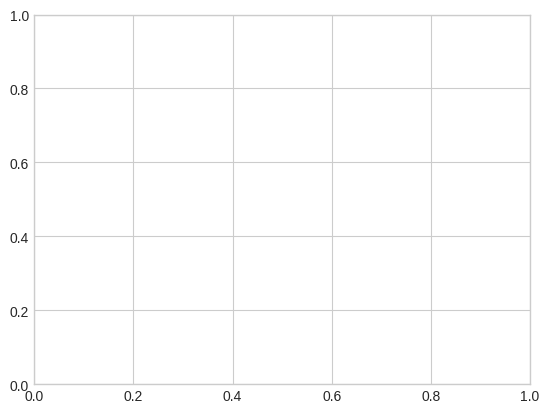

In [122]:
plt.scatter(times,acc_dataset)

100%|██████████| 100/100 [02:40<00:00,  1.61s/it]


Text(0, 0.5, 'Validation accuracy on CIFAR-10[\\%]')

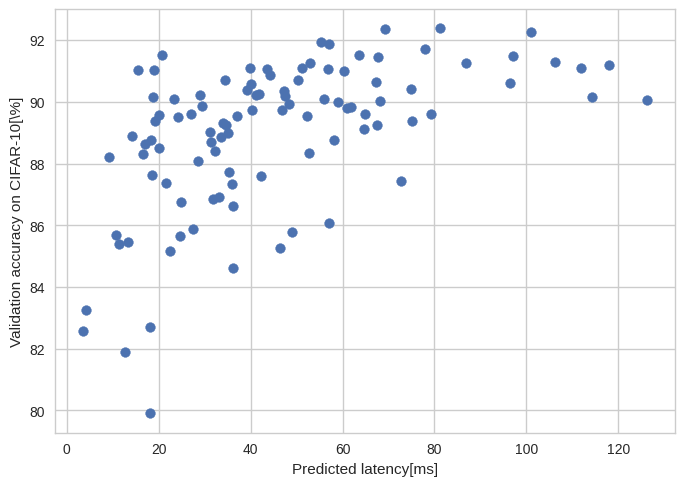

In [ ]:

r_shift = [9]*50
classify = 10
lat = []
for code in tqdm.tqdm(code_dataset[196-50:196+50]):
    pe = [8]*int(sum(code[-5:]))
    simd = [3] + [8]*int(sum(code[-5:])-1)
    config = model_analysis(code, pe, simd, r_shift, classify)
    conv_param, conv_config = config_param(code, config)
    bram, dsp, cycle = hw_inference(code, config)
    lat.append(cycle)


In [123]:
plt.scatter(lat,acc_dataset[196-50:196+50])
plt.xlabel("Predicted latency[ms]")
plt.ylabel("Validation accuracy on CIFAR-10[\%]")
plt.savefig("./pic/paper/random-search-cifar10-acc-latency.png")
plt.show()

NameError: name 'lat' is not defined

### CIFAR100

In [124]:
data_path = "/home/qhy/Reserach/AICAS/predictor/dataset/cifar100-data-dict-129-392-acc_above-20-add_best-searchx5.npy"
dataset = np.load(data_path,allow_pickle=True).item()
for k in dataset.keys():
    acc_list_all.append(dataset[k]['acc'])
    code_list_all.append(dataset[k]['code'])

In [125]:

r_shift = [9]*50
classify = 10
times_100 = []
for code in tqdm.tqdm(code_list_all[99-50:99+50]):
    pe = [8]*int(sum(code[-5:]))
    simd = [3] + [8]*int(sum(code[-5:])-1)
    config = model_analysis(code, pe, simd, r_shift, classify)
    conv_param, conv_config = config_param(code, config)
    bram, dsp, cycle = hw_inference(code, config)
    times_100.append(cycle)

  0%|          | 0/100 [00:00<?, ?it/s]


NameError: name 'model_analysis' is not defined

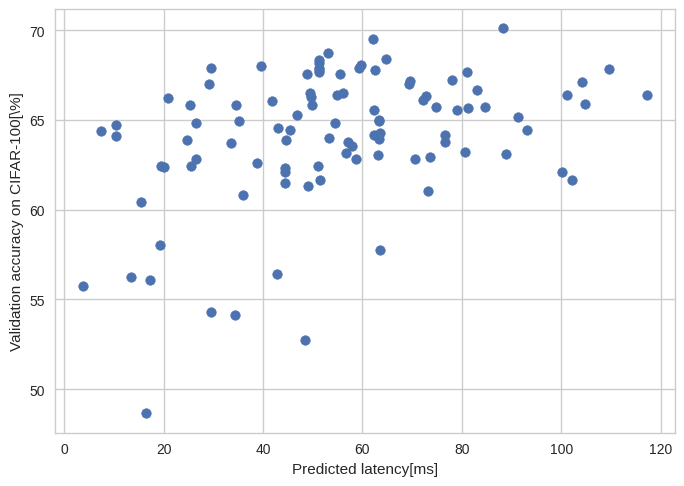

In [107]:
plt.scatter(times_100,acc_list_all[99-50:99+50])
plt.xlabel("Predicted latency[ms]")
plt.ylabel("Validation accuracy on CIFAR-100[\%]")
plt.savefig("./pic/paper/random-search-cifar100-acc-latency.png")
plt.show()

## best-searched model

### best-searched 和 random 进行比较
### CIFAR-10

In [147]:
import pandas as pd
df = pd.read_table("/home/qhy/Reserach/AICAS/best-search-2.md",delimiter='|')
df.drop(columns='Unnamed: 0',inplace=True) 
df.drop(columns='Unnamed: 12',inplace=True) 
df.drop(labels=[0],inplace=True)
df=df.reset_index(drop=True)
for i in range(90):
    df["flops"][i] = float(df["flops"][i])
    df["params"][i] = float(df["params"][i])
    df["Acc"][i] = float(df["Acc"][i])
    
df

,NO.,layer,ratio,op,pool,pool_type,datset,flops,params,Acc,constrain
0,15,2-1-4-1-1,1.0-0.125-1.0-1.0-0.125,repvgg-vgg-vgg-vgg-vgg,False-False-False-False-False,None-None-None-None-None-None,cifar10,75.07,0.94,91.49,acc+flops+params
1,17,1-3-1-1-1,1.0-0.125-1.0-1.0-0.125,vgg-vgg-vgg-vgg-vgg,False-False-False-False-False,None-None-None-None-None-None,cifar10,9.48,0.46,87.12,acc+flops+params
2,18,2-1-3-8-1,0.25-0.875-0.125-0.125-0.625,vgg-vgg-vgg-vgg-vgg,False-False-False-True-False,None-None-None-maxpool-None-None,cifar10,7.38,0.19,83.79,acc+flops+params
3,19,1-1-1-2-1,1.0-0.125-0.25-0.125-0.625,repvgg-repvgg-vgg-vgg-repvgg,False-False-False-False-True,None-None-None-None-maxpool-None,cifar10,3.78,0.12,83.69,acc+flops+params
4,20,1-1-1-1-1,0.75-0.25-0.75-0.125-0.375,vgg-vgg-vgg-repvgg-vgg,False-False-False-False-False,None-None-None-None-None-None,cifar10,4.89,0.11,85.04,acc+flops+params
...,...,...,...,...,...,...,...,...,...,...,...
85,104,2-4-3-1-2,1.0-0.875-0.625-1.0-0.125,repvgg-repvgg-vgg-vgg-vgg,False-True-False-False-False,None-maxpool-None-None-None-avgpool,cifar10,83.17,0.68,92.26,acc+latency
86,105,2-4-3-1-2,1.0-0.875-0.625-1.0-0.125,repvgg-repvgg-vgg-vgg-vgg,False-True-False-False-False,None-maxpool-None-None-None-avgpool,cifar10,83.17,0.68,92.26,acc+latency
87,106,2-4-3-1-1,1.0-1.0-0.75-1.0-0.25,repvgg-vgg-vgg-vgg-vgg,False-True-False-False-False,None-maxpool-None-None-None-avgpool,cifar10,96.5,0.93,92.24,acc+latency
88,107,1-1-1-1-1,0.125-0.5-0.125-0.875-0.25,vgg-vgg-vgg-vgg-vgg,False-True-False-False-False,None-avgpool-None-None-None-None,cifar10,2.74,0.3,84.62,acc+latency


In [148]:
nums = [int(i) for i in df['NO.']]

In [149]:
[mapping_op[i] for i in df['op'][n].split('-')]

[0, 1, 1, 1, 1]

In [150]:
mapping_op = {'repvgg':0,'vgg':1}
mapping_pool = {'maxpool':0,'avgpool':1,"None":2}
code_dataset=[]
lat_bs = []
for n in range(90):
    code_dataset.append([float(i) for i in df['ratio'][n].split('-')] + [mapping_op[i] for i in df['op'][n].split('-')] + [mapping_pool[i] for i in df['pool_type'][n].split('-')] + [int(i) for i in df['layer'][n].split('-')])
    

In [151]:
# plt.scatter(range(90),df['Acc'])


### 验证hardware cost predictor性能

In [10]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd

In [11]:
df = pd.read_excel("./hardware-cost.xlsx")
df

,BRAM,Pre BRAM,DSP,Pre DSP
0,123,215,40,40
1,1486,1859,678,752
2,2110,3507,2630,2944
3,1662,2307,1318,1472
4,2110,3203,2470,2768
5,1854,2691,1956,2192
6,1662,2155,1238,1384
7,1462,1579,342,376
8,2301,2482,456,456
9,2301,2482,336,336


In [12]:
for i in range(16):
    df.loc[22+i] = df.loc[i]+df.loc[21-i]
    df.loc[22+i] = df.loc[i]+df.loc[21-i]
    

In [164]:
df = pd.read_excel("./hardware-cost.xlsx")
df.drop(labels=[10,24,26,31,32,33,34,39,41],inplace=True)

KeyError: '[24, 26, 31, 32, 33, 34, 39, 41] not found in axis'

(35, 4)


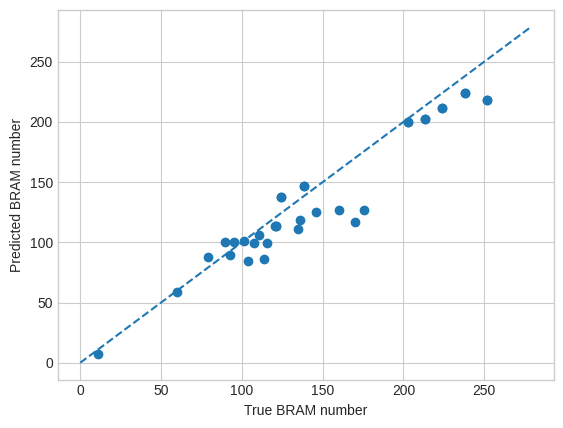

0.9442535795494946 1.737047820718879e-17 0.8928564648714526


In [13]:
from sklearn import metrics
from scipy import stats
df = pd.read_excel("./hardware-cost.xlsx")
for i in range(22):
    df.loc[22+i] = df.loc[i]+df.loc[21-i]
    df.loc[22+i] = df.loc[i]+df.loc[21-i]
df.drop(labels=[10,24,26,31,32,33,34,39,41],inplace=True)
print(df.shape)
plt.scatter(df['Pre BRAM']*0.05,df['BRAM']*0.06)
plt.plot(range(280),range(280),'--')
plt.ylabel("Predicted BRAM number")
plt.xlabel("True BRAM number")
plt.show()
train_acc_dataset = df['BRAM']*0.06
train_pred = df['Pre BRAM']*0.05
MSE = metrics.mean_squared_error(train_acc_dataset, train_pred)
r_train,p_train = stats.spearmanr(train_acc_dataset, train_pred)
R2_train = 1 - (MSE/np.mean((train_pred-np.mean(train_acc_dataset))**2))
print(r_train,p_train,R2_train)

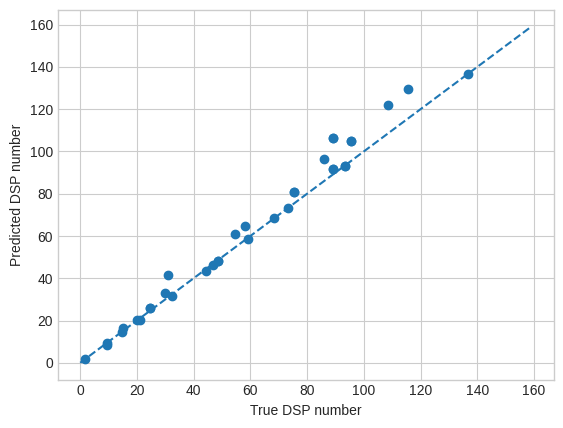

0.9797406263120026 1.2622095302053481e-24 0.9694320704403442


In [14]:
df_DSP = pd.read_excel("./hardware-cost.xlsx")
for i in range(22):
    df_DSP.loc[22+i] = df_DSP.loc[i]+df_DSP.loc[21-i]
    df_DSP.loc[22+i] = df_DSP.loc[i]+df_DSP.loc[21-i]
df_DSP.drop(labels=[10,24,26,31,32,33,34,39,41],inplace=True)
plt.scatter(df_DSP['DSP'][:]*0.044,df_DSP['Pre DSP'][:]*0.044)
plt.plot(range(160),range(160),'--')
plt.ylabel("Predicted DSP number")
plt.xlabel("True DSP number")
plt.show()
train_acc_dataset = df_DSP['DSP']*0.044
train_pred = df_DSP['Pre DSP']*0.044
MSE = metrics.mean_squared_error(train_acc_dataset, train_pred)
r_train,p_train = stats.spearmanr(train_acc_dataset, train_pred)
R2_train = 1 - (MSE/np.mean((train_pred-np.mean(train_acc_dataset))**2))
print(r_train,p_train,R2_train)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


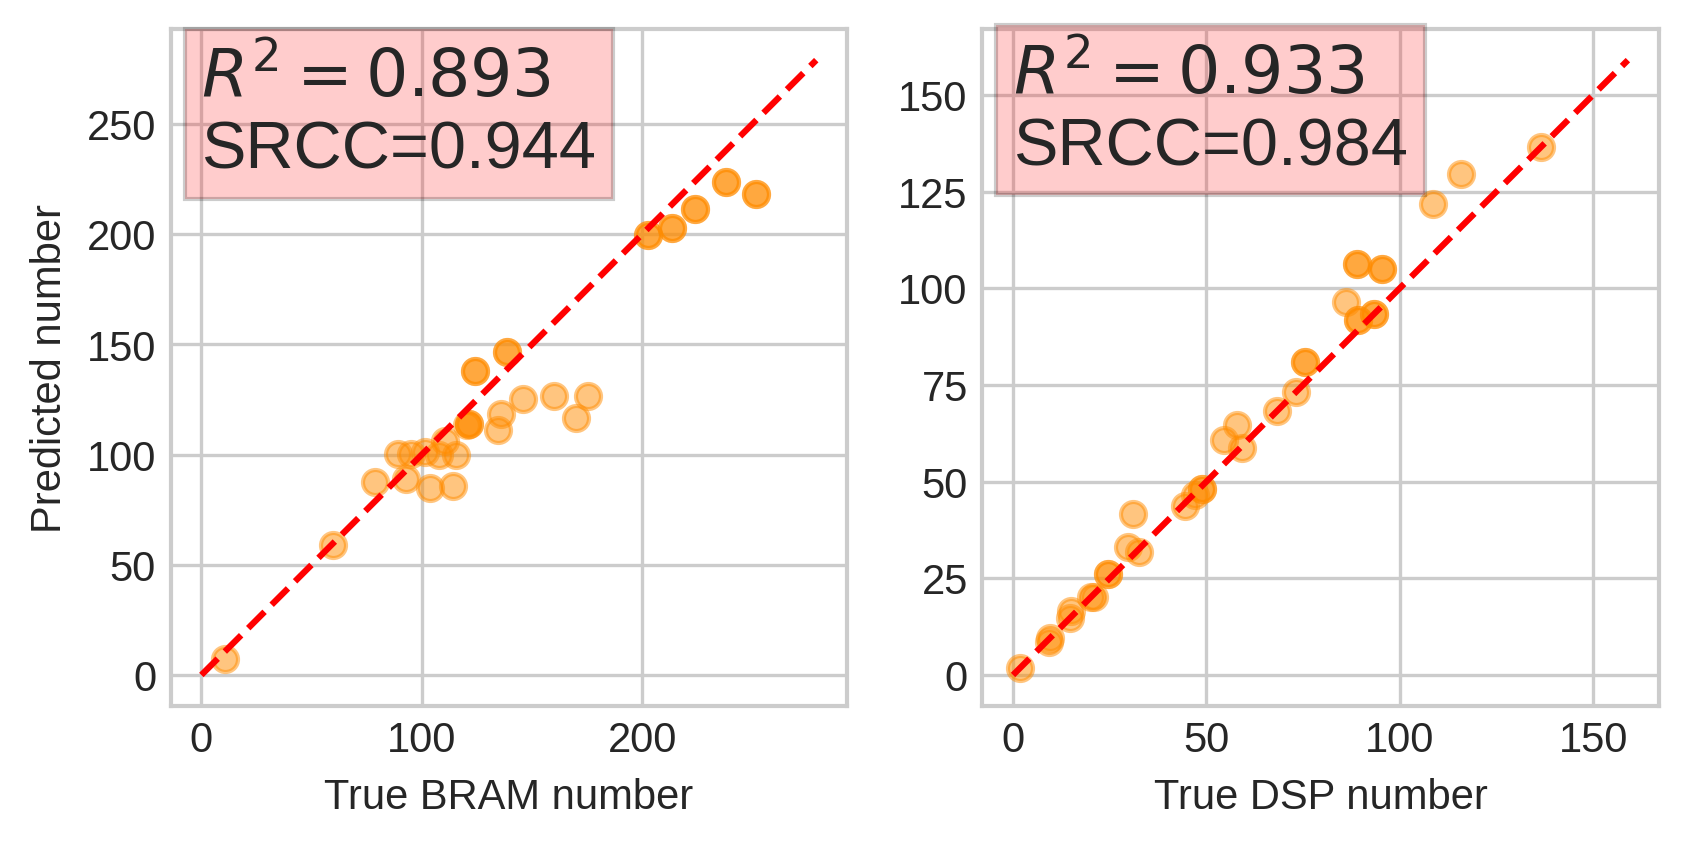

In [17]:

fig,ax = plt.subplots(1,2,dpi=300)
ax[0].set_aspect(1)
ax[1].set_aspect(1)
ax[0].scatter(df['Pre BRAM']*0.05,df['BRAM']*0.06,c='darkorange',alpha=0.5)
ax[0].plot(range(280),range(280),'--',c='r')
ax[0].set_ylabel("Predicted number")
ax[0].set_xlabel("True BRAM number")
ax[0].text(0,230,'$R^2 = 0.893$'+'\nSRCC=0.944',bbox=dict(facecolor='red', alpha=0.2),fontsize =16)
ax[1].scatter(df_DSP['DSP']*0.044,df_DSP['Pre DSP']*0.044,c='darkorange',alpha=0.5)
ax[1].plot(range(160),range(160),'--',c = 'r')
# ax[1].set_ylabel("Predicted DSP number")
ax[1].set_xlabel("True DSP number")
ax[1].text(0,132,'$R^2 = 0.933$'+'\nSRCC=0.984',bbox=dict(facecolor='red', alpha=0.2,),fontsize =16)
# plt.suptitle("The performance of hardware cost pedictor")
plt.savefig('./pic/paper/hardware-cost-predictor.eps',dpi=600)
plt.show()


In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
from scipy import stats
pred = [2.1,2.3,3.8,4.3,4.5,1.9,2.47,3.1,4.4,2.35,1.3,2.58,4.04,1.89,2.65,3.56,2.34,2.89,1.67,3.6]
train_pred = np.array(pred) 
train_acc_dataset = np.array(pred) + (np.random.random(20)-0.1)*0.5
acc = train_acc_dataset
print(acc)
MSE = metrics.mean_squared_error(train_acc_dataset, train_pred)
r_train,p_train = stats.spearmanr(train_acc_dataset, train_pred)
R2_train = 1 - (MSE/np.mean((train_pred-np.mean(train_acc_dataset))**2))
pred_cifar_100 = np.random.random(20)*4 + 2
acc_cifar_100 = pred_cifar_100 + (np.random.random(20)-0.5)
print(pred_cifar_100,acc_cifar_100)
train_pred_cifar100 = pred_cifar_100 
train_acc_dataset_cifar100 = acc_cifar_100
MSE_cifar100 = metrics.mean_squared_error(train_acc_dataset_cifar100, train_pred_cifar100)
r_train_cifar100,p_train_cifar100 = stats.spearmanr(train_acc_dataset_cifar100, train_pred_cifar100)
R2_train_cifar100 = 1 - (MSE_cifar100/np.mean((train_pred_cifar100-np.mean(train_acc_dataset_cifar100))**2))
print(r_train,p_train,R2_train)
print(r_train_cifar100,p_train_cifar100,R2_train_cifar100)
# plt.scatter(acc,pred)
# plt.scatter(acc_cifar_100,pred_cifar_100)

[2.07884003 2.6102588  4.21313108 4.60533334 4.7734333  1.93944309
 2.60071326 3.13780711 4.45397698 2.3118926  1.66772242 2.80877347
 4.27636509 1.84384386 2.67433722 3.9526641  2.4477747  3.06426777
 2.00583824 3.57043833]
[4.21715225 3.28296257 3.42788401 2.07427779 4.30979814 3.09363572
 2.50422019 4.32129945 5.36123259 4.43803726 5.45303381 4.88913221
 2.57025793 5.96284663 5.49793628 3.37466003 2.5910393  4.61676034
 5.48377673 4.55777609] [4.22469615 3.55197197 3.66435626 2.11343816 4.04571008 3.35375437
 2.84572521 4.46326591 5.39132174 4.52435142 5.13168377 5.19811576
 2.42497879 5.63234136 5.15826164 3.10838727 3.02599749 4.72831374
 5.18305311 4.89631029]
0.9804511278195487 3.6893592442965844e-14 0.9449262541747249
0.9669172932330825 3.998251637026956e-12 0.9487277124067345


/tmp/ipykernel_30453/2666444439.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


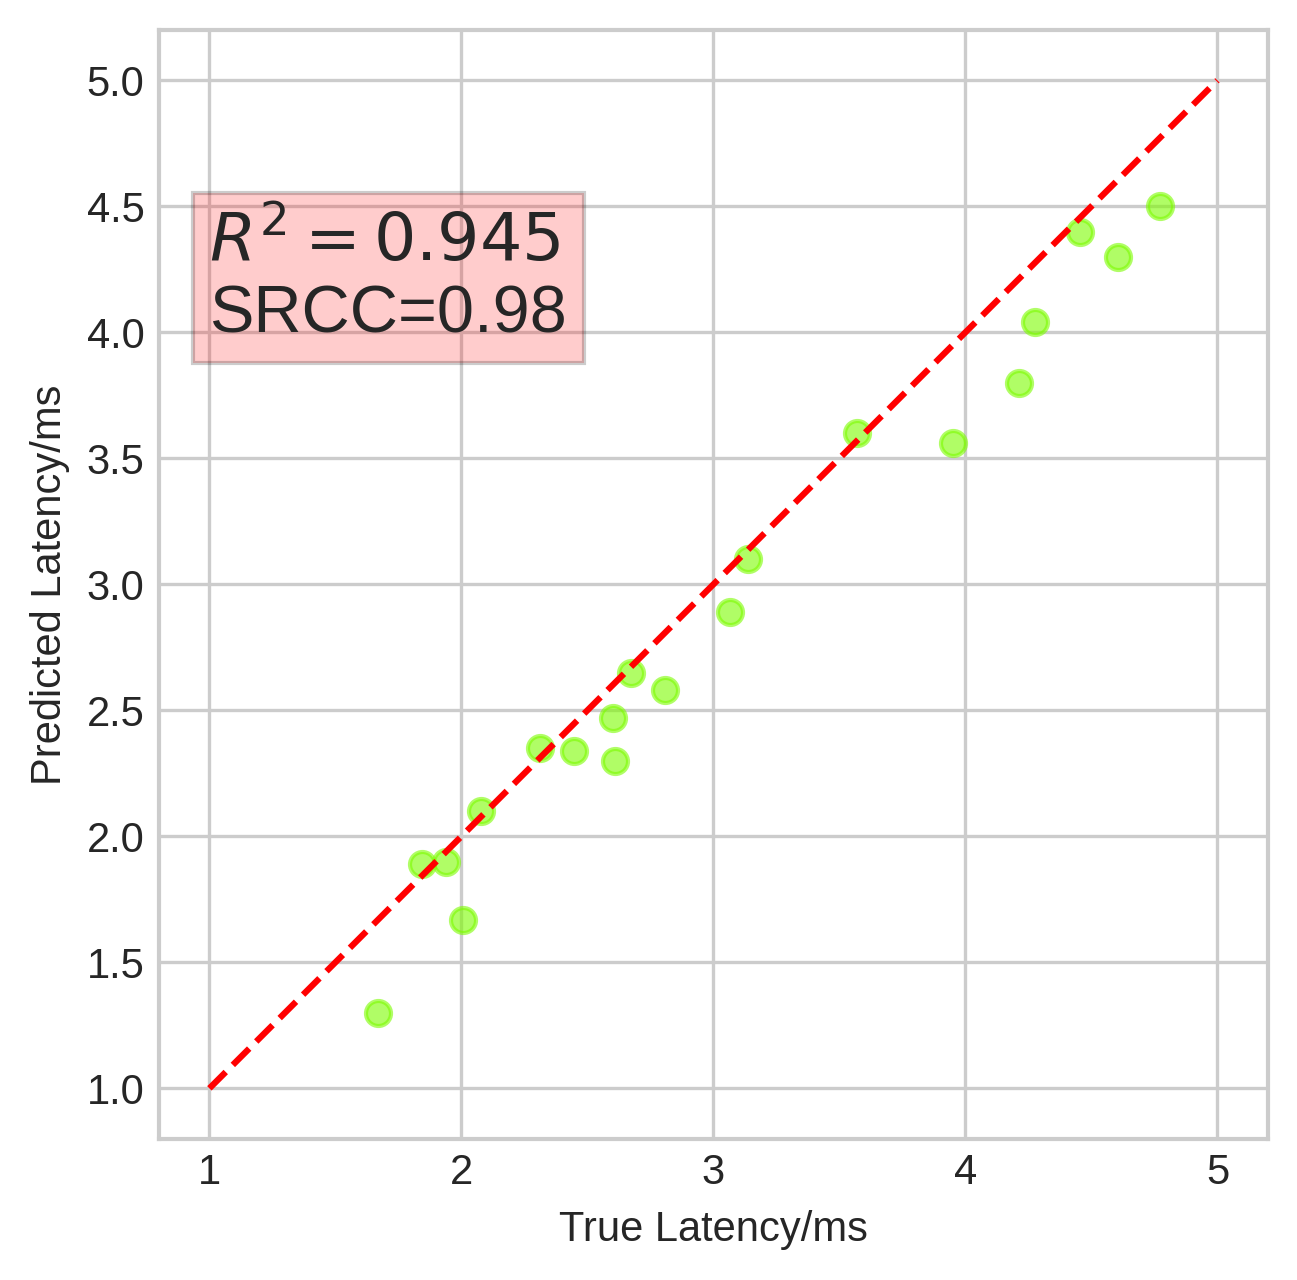

In [18]:
plt.style.use('seaborn-whitegrid')
fig,ax = plt.subplots(1,1,dpi=300)
ax.set_aspect(1)
# ax[1].set_aspect(1.01)
ax.scatter(acc,pred,c='lawngreen',alpha=0.6)
ax.plot(range(1,6),range(1,6),'--',c='r')
ax.set_ylabel("Predicted Latency/ms")
ax.set_xlabel("True Latency/ms")
# ax[0].set_title('CIFAR-10')
ax.text(1,4,'$R^2 = 0.945$'+'\nSRCC=0.98',bbox=dict(facecolor='red', alpha=0.2),fontsize =16)
# ax[1].scatter(acc_cifar_100,pred_cifar_100,c='c',alpha=0.5)
# ax[1].plot(range(2,7),range(2,7),'--',c = 'r')
# # ax[1].set_ylabel("Predicted DSP number")
# ax[1].set_xlabel("True Latency/ms")
# ax[1].text(2,5,'$R^2 = 0.946$'+'\nSRCC=0.955',bbox=dict(facecolor='red', alpha=0.2,),fontsize =16)
# ax[1].set_title('CIFAR-100')

# plt.suptitle("The performance of hardware cost pedictor")
plt.savefig('./pic/paper/latency-predictor.eps',dpi=600)
plt.show()


/tmp/ipykernel_30453/2314506695.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


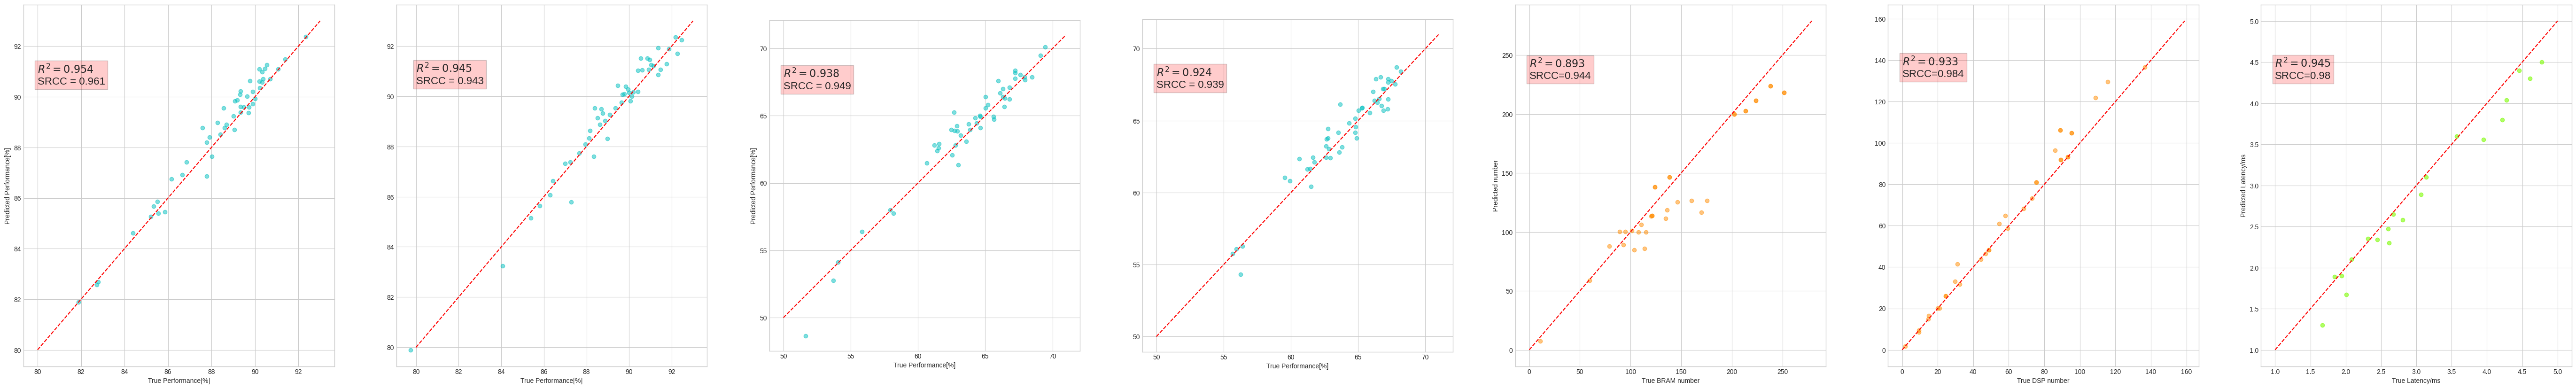

In [39]:
fig,ax = plt.subplots(1,7,figsize=(70,10))
code_dataset = np.load("/home/qhy/Reserach/AICAS/predictor/dataset/code_510-989-add-new-searched.npy").astype(np.float32)
acc_dataset = np.load("/home/qhy/Reserach/AICAS/predictor/dataset/acc_32_510-989-add-new-searched.npy").astype(np.float32)
train_code_dataset = code_dataset[train_num-50:train_num]
test_code_dataset = code_dataset[train_num:train_num+50]
train_acc_dataset = acc_dataset[train_num-50:train_num]
test_acc_dataset = acc_dataset[train_num:train_num+50]
train_acc_dataset, test_acc_dataset, train_pred, test_pred = test(196, "/home/qhy/Reserach/AICAS/predictor/MLP/cifar10/"+'loss-mse-ratio-1e-05-input_dims-21-train_num-400-num_layers-5-layer_width-40_80_40_20_10-lr-0.01-regular-0.1-r-train-0.9738-r-test-0.713-diff2-1688.4561.pth')
plt.style.use('seaborn-whitegrid')
# 196, , 0.9548209011554718, 0.9519959501922131, 0.9659991400269863, 0.965495716481926
# fig,ax = plt.subplots(1,2,dpi=300)
# ax[0].set_aspect(1)
# ax[1].set_aspect(1)

ax[0].scatter(train_pred,train_acc_dataset,c='c',alpha=0.5)
ax[0].plot(range(80,94),range(80,94),'--',c="r")
# ax[0].set_title("Train")
ax[1].scatter(test_pred,test_acc_dataset,c='c',alpha=0.5)
ax[1].plot(range(80,94),range(80,94),'--',c="r")  
# ax[1].set_title("Test")
ax[0].set_xlabel("True Performance[%]")
ax[1].set_xlabel("True Performance[%]")
ax[0].set_ylabel("Predicted Performance[%]")
ax[0].text(80,90.5,'$R^2 = 0.954$'+"\nSRCC = 0.961",bbox=dict(facecolor='red', alpha=0.2),fontsize =16)
ax[1].text(80,90.5,'$R^2 = 0.945$'+"\nSRCC = 0.943",bbox=dict(facecolor='red', alpha=0.2),fontsize =16)
# plt.suptitle('CIFAR-10',x=0.5,y=0.82,fontweight='bold')
# plt.savefig("./pic/paper/acc-predictor-cifar-10.eps",dpi=600)
# plt.show()
acc_list_all = []
code_list_all = []
data_path = "/home/qhy/Reserach/AICAS/predictor/dataset/cifar100-data-dict-129-392-acc_above-20-add_best-searchx5.npy"
dataset = np.load(data_path,allow_pickle=True).item()
for k in dataset.keys():
    acc_list_all.append(dataset[k]['acc'])
    code_list_all.append(dataset[k]['code'])
train_acc_dataset_100, test_acc_dataset_100, train_pred_100, test_pred_100 = test_100(99, "/home/qhy/Reserach/AICAS/predictor/MLP/cifar100/"+'loss-mse-ratio-1e-05-input_dims-21-train_num-140-num_layers-5-layer_width-40_80_40_20_10-lr-0.01-regular-0.1-r-train-0.95-r-test-0.8193-diff2-1389.6346.pth')
# plt.style.use('seaborn-whitegrid')
# fig,ax = plt.subplots(1,2,dpi=300)
ax[2].set_aspect(1)
ax[3].set_aspect(1.07)
ax[2].scatter(train_pred_100,train_acc_dataset_100,c='c',alpha=0.5)
ax[2].plot(range(50,72),range(50,72),'--',c="r")
# ax[2].set_title("Train")
ax[3].scatter(test_pred_100,test_acc_dataset_100,c='c',alpha=0.5)
ax[3].plot(range(50,72),range(50,72),'--',c="r")  
# ax[3].set_title("Test")
ax[2].set_xlabel("True Performance[%]")
ax[3].set_xlabel("True Performance[%]")
ax[2].set_ylabel("Predicted Performance[%]")
ax[2].text(50,67.,'$R^2 = 0.938$'+"\nSRCC = 0.949",bbox=dict(facecolor='red', alpha=0.2),fontsize =16)
ax[3].text(50,67.3,'$R^2 = 0.924$'+"\nSRCC = 0.939",bbox=dict(facecolor='red', alpha=0.2),fontsize =16)
# plt.suptitle('CIFAR-100',x=0.5,y=0.82,fontweight='bold')
# plt.savefig("./pic/paper/acc-predictor-cifar-100.eps",dpi=600)
# plt.show()
ax[4].scatter(df['Pre BRAM']*0.05,df['BRAM']*0.06,c='darkorange',alpha=0.5)
ax[4].plot(range(280),range(280),'--',c='r')
ax[4].set_ylabel("Predicted number")
ax[4].set_xlabel("True BRAM number")
ax[4].text(0,230,'$R^2 = 0.893$'+'\nSRCC=0.944',bbox=dict(facecolor='red', alpha=0.2),fontsize =16)
ax[5].scatter(df_DSP['DSP']*0.044,df_DSP['Pre DSP']*0.044,c='darkorange',alpha=0.5)
ax[5].plot(range(160),range(160),'--',c = 'r')
# ax[5].set_ylabel("Predicted DSP number")
ax[5].set_xlabel("True DSP number")
ax[5].text(0,132,'$R^2 = 0.933$'+'\nSRCC=0.984',bbox=dict(facecolor='red', alpha=0.2,),fontsize =16)

ax[6].scatter(acc,pred,c='lawngreen',alpha=0.6)
ax[6].plot(range(1,6),range(1,6),'--',c='r')
ax[6].set_ylabel("Predicted Latency/ms")
ax[6].set_xlabel("True Latency/ms")
# ax[6][4].set_title('CIFAR-10')
ax[6].text(1,4.3,'$R^2 = 0.945$'+'\nSRCC=0.98',bbox=dict(facecolor='red', alpha=0.2),fontsize =16)
plt.savefig('./pic/paper/big.eps',dpi=600)